In [2]:
%load_ext autoreload
%autoreload 2
from face_lib.dataset_classes.lightning_datasets import MXFaceDataset
import numpy as np
from pathlib import Path
from tqdm import tqdm

In [3]:
num_classes = 3531
ds = MXFaceDataset("/app/datasets/ms1m/", True, num_classes)

## Create meta files

In [ ]:
num_probe_templates = 4
gallery_size = 1772
ds.create_identification_meta(Path("/app/datasets/ms1m_ident"), gallery_size)

In [89]:
image_ids

array([72922, 72922, 72922, ..., 59906, 59906, 59906])

In [85]:
from evaluation.test_datasets import FaceRecogntioniDataset

dataset_name = "IJBC"
dataset_path = "/app/datasets/arcface_ijb/IJBC"
ijb_c = FaceRecogntioniDataset(dataset_name, dataset_path)

In [87]:
np.unique(ijb_c.g1_ids).shape

(1772,)

In [10]:
np.mean(unique_counts)

67.90899442513587

In [13]:
from evaluation.test_datasets import FaceRecogntioniDataset

dataset_name = "IJBC"
dataset_path = "/app/datasets/arcface_ijb/IJBC"
ijb_c = FaceRecogntioniDataset(dataset_name, dataset_path)

In [52]:
len(ijb_c.templates)

469375

In [53]:
emb = np.load("/app/datasets/arcface_ijb/IJBC/embeddings/scf_embs_IJBC.npz")

In [61]:
len(emb["embs"])

469375

In [59]:
list(emb.keys())

['embs', 'unc']

In [15]:
unique_templates, unique_counts_templates = np.unique(
    ijb_c.probe_templates, return_counts=True
)

In [26]:
import pandas as pd

df = pd.DataFrame({"sid": ijb_c.probe_ids, "tid": ijb_c.probe_templates})

In [50]:
len(df["sid"].unique())

3531

In [38]:
a = df.groupby("sid")["tid"].unique().values

In [44]:
templates_per_class_count = [len(x) for x in a]

/home/erlygin/miniconda/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

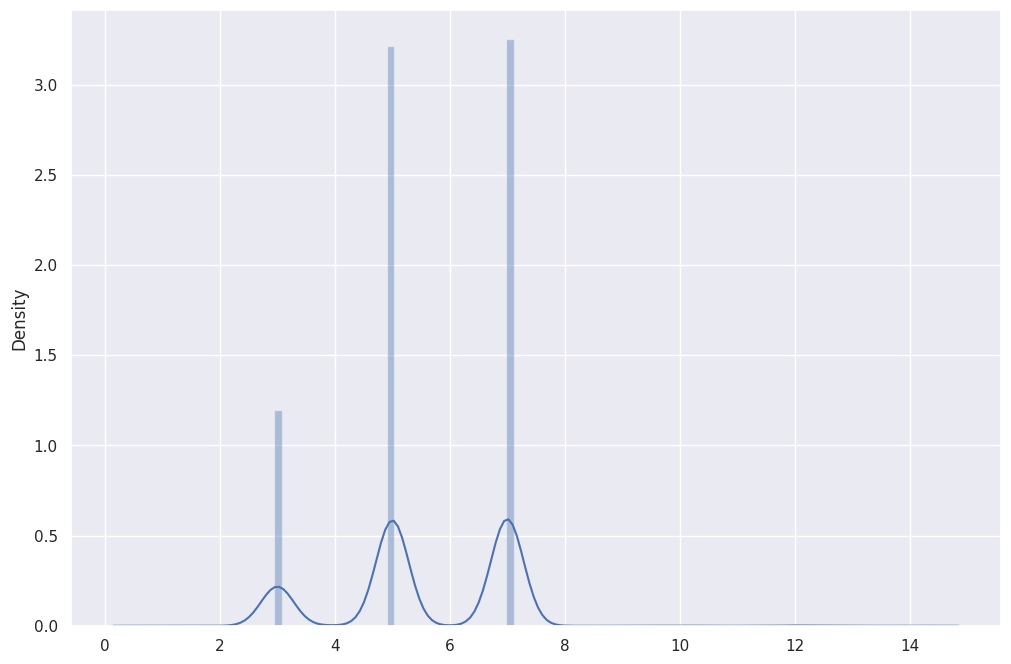

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme()
plt.figure(figsize=(12, 8))
sns.distplot(
    templates_per_class_count,
    kde=True,
    norm_hist=True,
    hist=True,
    label="probe_template_distr",
    bins=100,
)

In [25]:
ijb_c.probe_ids

array([    1,     1,     1, ..., 28936, 28936, 28936])

In [ ]:
1

/home/erlygin/miniconda/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

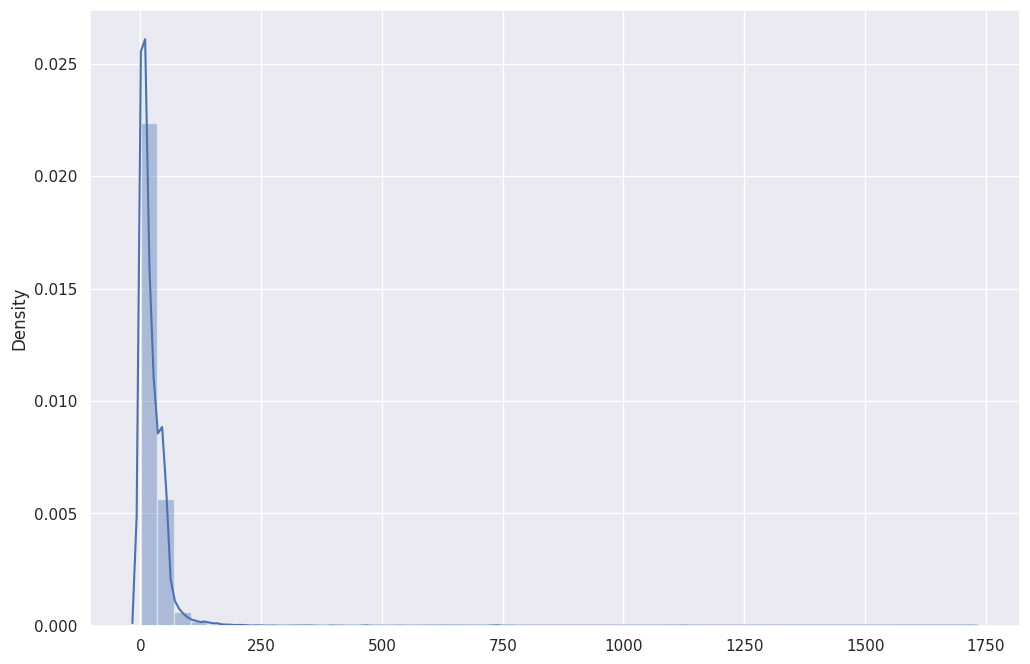

In [20]:
unique_counts_templates
sns.set_theme()
plt.figure(figsize=(12, 8))
sns.distplot(
    unique_counts_templates,
    kde=True,
    norm_hist=True,
    hist=True,
    label="probe_template_distr",
)

In [16]:
len(unique_templates)

19593